<>:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:123: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:159: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:161: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:163: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:165: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:167: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:123: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:159: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:161: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:163: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:165: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:167: SyntaxWarning: "is" with a literal. Did you mean "=="?


[351. 364. 377. 390. 403. 416. 429. 442.]
the gain of fa_rss over bm_sa is 0.3321145888546579
the gain of fa_rss over fa_cut is nan
the gain of fa_rss over sap_bm is 0.7405013135365296


/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_rate':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:123: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'total_path_length':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:159: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'total_path_length':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:161: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'service_blocking_rate':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:163: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'rss_total_metric':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:165: SyntaxWarning: "is" with a literal. Did y

the gain of bm_sa over fa_rss is 0.044877974725111854
the gain of bm_sa over fa_rs is 0.10299398289790744
the gain of fa_rss over fa_cut is nan
the gain of fa_rss over sap_bm is -0.11481972354058936


/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:157: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:172: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:157: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:172: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:157: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_44063/3214451809.py:172: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


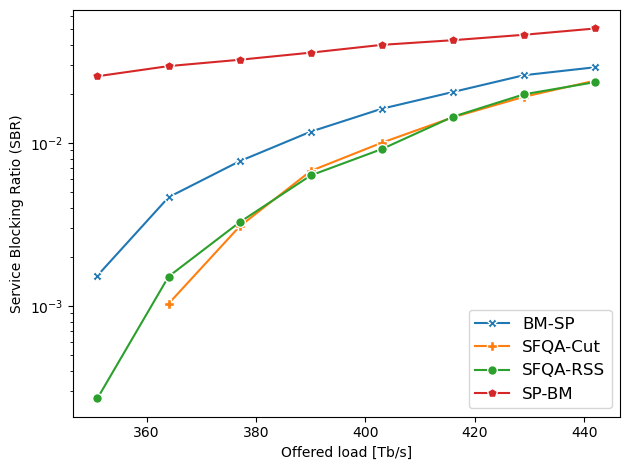

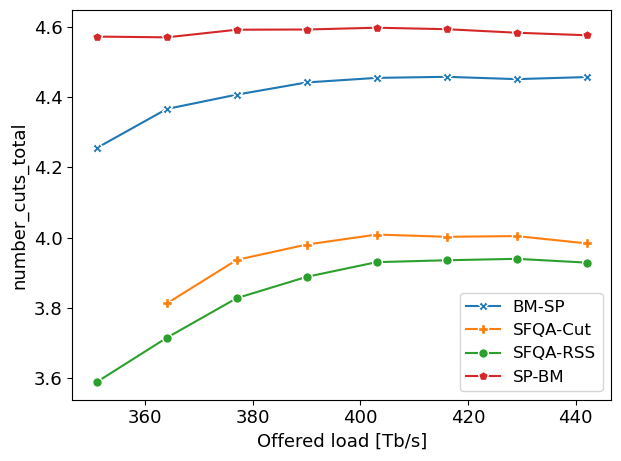

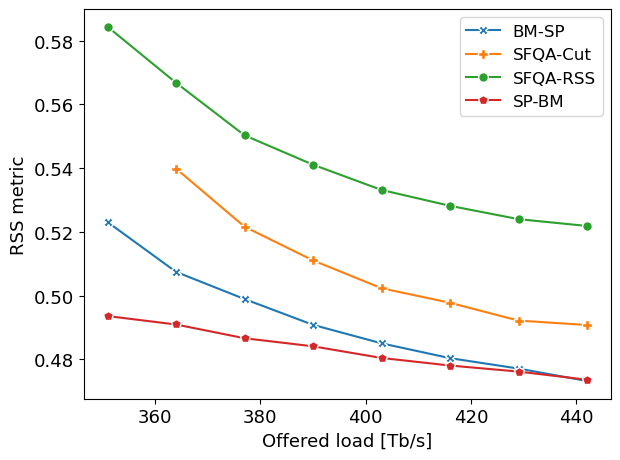

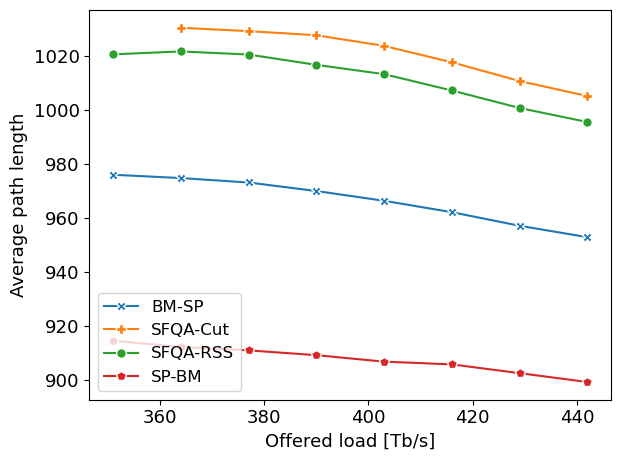

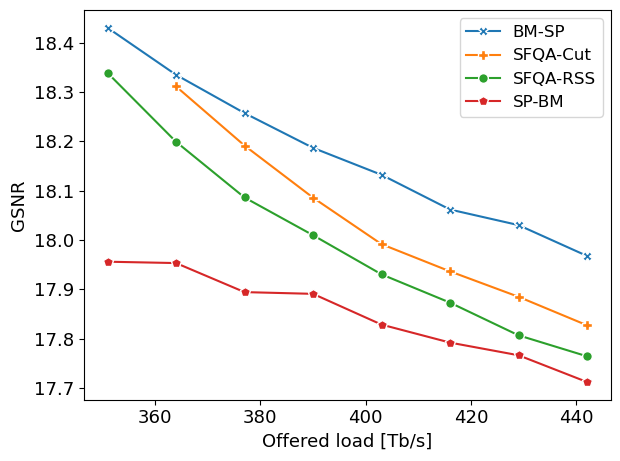

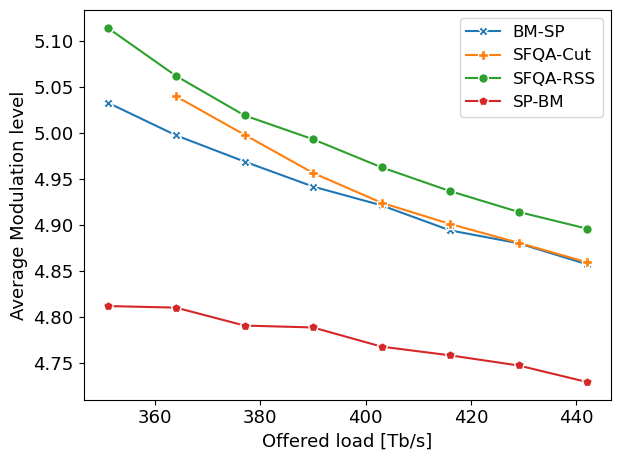

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
# from IPython.core.display import clear_output
import numpy as np
import time

heuristic_log_dir = 'phy_frag_rmsa'

topology_name = 'Germany50'
topology_name = 'jpn12'
figures_floder = f'./{heuristic_log_dir}/figures'
os.makedirs(figures_floder, exist_ok=True)

min_load = 1080
max_load = 1382
step_length = 40
steps = int((max_load - min_load) / step_length) + 1
loads = np.zeros(steps)
episode_length = 205

metrics = [
    'episode_service_blocking_rate',
    'service_blocking_rate',
    'episode_bit_rate_blocking_rate',
    'number_cuts_total',
    'rss_total_metric',
    'C_BVTs',
    'L_BVTs',
    'S_BVTs',
    'total_path_length',
    'avrage_gsnr',
    'average_mod_level',
    
]

sap_ff_loads = {metric: [] for metric in metrics}
sap_bm_loads = {metric: [] for metric in metrics}
bm_fa_cut_loads = {metric: [] for metric in metrics}
bm_fa_rss_loads = {metric: [] for metric in metrics}
bm_sa_ff_loads = {metric: [] for metric in metrics}
traffic_type = 1

for load_counter, load_traffic in enumerate(range(min_load, max_load, step_length)):
    bm_fa_cut = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-Cut-modified.monitor.csv',
        skiprows=1)
    bm_fa_rss = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-RSS.monitor.csv', skiprows=1)
    bm_sa_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-SA-FF.monitor.csv',
        skiprows=1)
    sap_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/SAP-FF.monitor.csv',
        skiprows=1)

    sap_bm = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-SAPBM.monitor.csv',
        skiprows=1)
    loads[load_counter] = load_traffic
    for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                'C_BVTs', 'L_BVTs', 'S_BVTs', 'total_path_length', 'avrage_gsnr', 'average_mod_level' ]:
        bm_fa_cut_loads[info].append(np.mean(bm_fa_cut[info]))
        #             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
        bm_fa_rss_loads[info].append(np.mean(bm_fa_rss[info]))
        bm_sa_ff_loads[info].append(np.mean(bm_sa_ff[info]))
        sap_ff_loads[info].append(np.mean(sap_ff[info]))
        sap_bm_loads[info].append(np.mean(sap_bm[info]))

# print(loads)
# print(f"SBR for highest-first-fit is {highest_loads['service_blocking_per_hundred_arrivals']}")


# percentage = []
# percentage1 = []
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage.append((no_df_loads['service_blocking_per_hundred_arrivals'][i] -
#                        exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                       no_df_loads['service_blocking_per_hundred_arrivals'][i])
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage1.append((oldest_loads['service_blocking_per_hundred_arrivals'][i] -
#                         exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                        oldest_loads['service_blocking_per_hundred_arrivals'][i])

# print(f"the exhaustic vs. no df-{[round(item, 2) for item in percentage]}")
# print(f"the exhaustic vs. oldest-{[round(item, 2) for item in percentage1]}")

markersize = 7
offered_load = loads*325*(0.001)
print(offered_load)
for info in ['service_blocking_rate',
                 'number_cuts_total', 'rss_total_metric',
                 'total_path_length','avrage_gsnr', 'average_mod_level']:
    plt.figure()
    if info is 'service_blocking_rate':
    # if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate':
        # print(f"{np.mean(bm_sa_ff_loads[info])}")
        # print(np.mean(bm_fa_cut_loads[info]))
        # print(np.mean(bm_fa_rss_loads[info]))
        # # print(np.mean(sap_ff_loads[info]))
        # print(np.mean(sap_bm_loads[info]))
        av_bm_sa = np.mean(bm_sa_ff_loads[info])
        av_bm_fa_cut = np.mean(bm_fa_cut_loads[info])
        av_bm_fa_rss = np.mean(bm_fa_rss_loads[info])
        av_sap_bm = np.mean(sap_bm_loads[info])
        print(f"the gain of fa_rss over bm_sa is {(av_bm_sa - av_bm_fa_rss)/av_bm_sa}")
        print(f"the gain of fa_rss over fa_cut is {(av_bm_fa_cut - av_bm_fa_rss)/av_bm_fa_cut}")
        print(f"the gain of fa_rss over sap_bm is {(av_sap_bm - av_bm_fa_rss)/av_sap_bm}")
        
        ax_bm_sa_ff = plt.semilogy(offered_load, bm_sa_ff_loads[info], label='BM-SP', marker='X', markersize=markersize,
                             markeredgecolor='white')
        ax_bm_fa_cut = plt.semilogy(offered_load, bm_fa_cut_loads[info], label='SFQA-Cut', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_rss = plt.semilogy(offered_load, bm_fa_rss_loads[info], label='SFQA-RSS', marker='o',
                                           markersize=markersize, markeredgecolor='white')
        # ax_sap_ff = plt.semilogy(loads, sap_ff_loads[info], label='SAP_FC', marker='p', markersize=markersize,
        #                           markeredgecolor='white')
        ax_sap_bm = plt.semilogy(offered_load, sap_bm_loads[info], label='SP-BM', marker='p', markersize=markersize,
                                  markeredgecolor='white')
    else:
        if info is 'total_path_length':
            av_bm_sa = np.mean(bm_sa_ff_loads[info])
            av_bm_fa_cut = np.mean(bm_fa_cut_loads[info])
            av_bm_fa_rss = np.mean(bm_fa_rss_loads[info])
            av_sap_bm = np.mean(sap_bm_loads[info])
            print(f"the gain of bm_sa over fa_rss is {(-av_bm_sa + av_bm_fa_rss)/av_bm_fa_rss}")
            print(f"the gain of bm_sa over fa_rs is {(-av_sap_bm + av_bm_fa_rss)/av_bm_fa_rss}")
            print(f"the gain of fa_rss over fa_cut is {(av_bm_fa_cut - av_bm_fa_rss)/av_bm_fa_cut}")
            print(f"the gain of fa_rss over sap_bm is {(av_sap_bm - av_bm_fa_rss)/av_sap_bm}")
        
        ax_bm_sa_ff = plt.plot(offered_load, bm_sa_ff_loads[info], label='BM-SP', marker='X', markersize=markersize,
                         markeredgecolor='white')
        ax_bm_fa_cut = plt.plot(offered_load, bm_fa_cut_loads[info], label='SFQA-Cut', marker='P', markersize=markersize,
                             markeredgecolor='white')
        ax_bm_fa_rss = plt.plot(offered_load, bm_fa_rss_loads[info], label='SFQA-RSS', marker='o',
                                       markersize=markersize, markeredgecolor='white')
        # ax_sap_ff = plt.plot(loads, sap_ff_loads[info], label='SAP_FC', marker='p', markersize=markersize,
        #                       markeredgecolor='white')
        ax_sap_bm = plt.plot(offered_load, sap_bm_loads[info], label='SP-BM', marker='p', markersize=markersize,
                                  markeredgecolor='white')
        plt.tight_layout()
    #
    # print(f"the bm-sa-ff for {info} is {np.mean(bm_sa_ff_loads[info])} ")
    # print(f"the bm_fa_cut for {info} is {np.mean(bm_fa_cut_loads[info])} ")
    # print(f"the bm_fa_rss for {info} is {np.mean(bm_fa_rss_loads[info])} ")
    # print(f"the sap_ff for {info} is {np.mean(sap_ff_loads[info])} ")

    plt.xlabel('Offered load [Tb/s]')
    # if info == 'service_blocking_per_hundred_arrivals':
    #     plt.ylabel('Service Blocking Ratio (SBR)', fontsize=13)
    # elif info == 'episode_frag_metric':
    #     plt.ylabel('RSS metric', fontsize=13)
    # else:
    #     plt.ylabel(info)
    plt.tight_layout()
    plt.legend(loc='upper right')
    if info is 'total_path_length':
        plt.ylabel('Average path length')
    elif info is 'service_blocking_rate':
        plt.ylabel('Service Blocking Ratio (SBR)')
    elif info is 'rss_total_metric':
        plt.ylabel('RSS metric')
    elif info is 'avrage_gsnr':
        plt.ylabel('GSNR')
    elif info is 'average_mod_level':
        plt.ylabel('Average Modulation level')
    else:
        plt.ylabel(info)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.rcParams.update({'font.size': 13})
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.pdf')
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.svg')





In [20]:
## This is for defragmentation

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
# from IPython.core.display import clear_output
import numpy as np
import time

heuristic_log_dir = 'phy_frag_rmsa'

topology_name = 'Germany50'
topology_name = 'jpn12'
figures_floder = f'./{heuristic_log_dir}/figures'
os.makedirs(figures_floder, exist_ok=True)

min_load = 1180
max_load = 1430
step_length = 60
steps = int((max_load - min_load) / step_length) + 1
loads = np.zeros(steps)

metrics = [
    'episode_service_blocking_rate',
    'service_blocking_rate',
    'episode_bit_rate_blocking_rate',
    'number_cuts_total',
    'rss_total_metric',
    'C_BVTs',
    'L_BVTs',
    'S_BVTs',
    'total_path_length',
    'num_moves',
    'num_defrag_cycle'
]

episode_length = 210
sap_ff_loads = {metric: [] for metric in metrics}
bm_fa_cut_loads = {metric: [] for metric in metrics}
bm_fa_rss_loads = {metric: [] for metric in metrics}
bm_sa_ff_loads = {metric: [] for metric in metrics}
sap_ff_df_loads = {metric: [] for metric in metrics}
bm_fa_cut_df_loads = {metric: [] for metric in metrics}
bm_fa_rss_df_loads = {metric: [] for metric in metrics}
bm_sa_ff_df_loads = {metric: [] for metric in metrics}
traffic_type = 1

for load_counter, load_traffic in enumerate(range(min_load, max_load, step_length)):
    bm_fa_cut = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-Cut.monitor.csv',
        skiprows=1)

    bm_fa_cut_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation/BM-FA-Cut.monitor.csv', skiprows=1)
    
    bm_fa_rss = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-RSS.monitor.csv', skiprows=1)
    bm_fa_rss_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation/BM-FA-RSS.monitor.csv', skiprows=1)

    
    bm_sa_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-SA-FF.monitor.csv',
        skiprows=1)
    bm_sa_ff_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation/BM-SA-FF.monitor.csv',
        skiprows=1)

    
    sap_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/SAP-FF.monitor.csv',
        skiprows=1)
    sap_ff_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation/SAP-FF.monitor.csv',
        skiprows=1)
    loads[load_counter] = load_traffic

    
    for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                'C_BVTs', 'L_BVTs', 'S_BVTs', 'total_path_length', 'num_moves', 'num_defrag_cycle']:
        bm_fa_cut_loads[info].append(np.mean(bm_fa_cut[info]))
        #             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
        bm_fa_rss_loads[info].append(np.mean(bm_fa_rss[info]))
        bm_sa_ff_loads[info].append(np.mean(bm_sa_ff[info]))
        sap_ff_loads[info].append(np.mean(sap_ff[info]))
        bm_fa_cut_df_loads[info].append(np.mean(bm_fa_cut_df[info]))
        #             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
        bm_fa_rss_df_loads[info].append(np.mean(bm_fa_rss_df[info]))
        bm_sa_ff_df_loads[info].append(np.mean(bm_sa_ff_df[info]))
        sap_ff_df_loads[info].append(np.mean(sap_ff_df[info]))

# print(loads)
# print(f"SBR for highest-first-fit is {highest_loads['service_blocking_per_hundred_arrivals']}")


# percentage = []
# percentage1 = []
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage.append((no_df_loads['service_blocking_per_hundred_arrivals'][i] -
#                        exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                       no_df_loads['service_blocking_per_hundred_arrivals'][i])
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage1.append((oldest_loads['service_blocking_per_hundred_arrivals'][i] -
#                         exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                        oldest_loads['service_blocking_per_hundred_arrivals'][i])

# print(f"the exhaustic vs. no df-{[round(item, 2) for item in percentage]}")
# print(f"the exhaustic vs. oldest-{[round(item, 2) for item in percentage1]}")

markersize = 7
for info in ['service_blocking_rate',
                , 'number_cuts_total', 'rss_total_metric',
                'C_BVTs', 'L_BVTs', 'S_BVTs', 'total_path_length', 'num_moves', 'num_defrag_cycle']:
    plt.figure()
    if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate' or info is 'episode_bit_rate_blocking_rate':
    # if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate':
        print(f"{np.mean(bm_sa_ff_loads[info])}")
        print(np.mean(bm_fa_cut_loads[info]))
        print(np.mean(bm_fa_rss_loads[info]))
        print(np.mean(sap_ff_loads[info]))
        print(f"{np.mean(bm_sa_ff_df_loads[info])}")
        print(np.mean(bm_fa_cut_df_loads[info]))
        print(np.mean(bm_fa_rss_df_loads[info]))
        print(np.mean(sap_ff_df_loads[info]))
        ax_bm_sap_df = plt.semilogy(loads, sap_ff_df_loads[info], label='sap_ff_defragmentation', marker='X', markersize=markersize,
                             markeredgecolor='white')

        ax_sap_ff = plt.semilogy(loads, sap_ff_loads[info], label='sap_ff', marker='p', markersize=markersize,
                                  markeredgecolor='white')
        ax_bm_fa_cut = plt.semilogy(loads, bm_fa_cut_loads[info], label='bm_fa_cut', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_cut_df = plt.semilogy(loads, bm_fa_cut_df_loads[info], label='bm_fa_cut_defragmentation', marker='o',
                                           markersize=markersize, markeredgecolor='white')


        
        ax_bm_sa_ff_df = plt.semilogy(loads, bm_sa_ff_df_loads[info], label='bm_sa_ff_defragmentation', marker='X', markersize=markersize,
                             markeredgecolor='white')

        ax_bm_sa_ff = plt.semilogy(loads, bm_sa_ff_loads[info], label='bm_sa_ff', marker='p', markersize=markersize,
                                  markeredgecolor='white')
        ax_bm_fa_rss = plt.semilogy(loads, bm_fa_rss_loads[info], label='bm_fa_rss', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_rss_df = plt.semilogy(loads, bm_fa_rss_df_loads[info], label='bm_fa_rss_defragmentation', marker='o',
                                           markersize=markersize, markeredgecolor='white')

    else:
        ax_bm_sap_df = plt.plot(loads, sap_ff_df_loads[info], label='sap_ff_defragmentation', marker='X', markersize=markersize,
                             markeredgecolor='white')

        ax_sap_ff = plt.plot(loads, sap_ff_loads[info], label='sap_ff', marker='p', markersize=markersize,
                                  markeredgecolor='white')
        ax_bm_fa_cut = plt.plot(loads, bm_fa_cut_loads[info], label='bm_fa_cut', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_cut_df = plt.plot(loads, bm_fa_cut_df_loads[info], label='bm_fa_cut_defragmentation', marker='o',
                                           markersize=markersize, markeredgecolor='white')


        
        ax_bm_sa_ff_df = plt.plot(loads, bm_sa_ff_df_loads[info], label='bm_sa_ff_defragmentation', marker='X', markersize=markersize,
                             markeredgecolor='white')

        ax_bm_sa_ff = plt.plot(loads, bm_sa_ff_loads[info], label='bm_sa_ff', marker='p', markersize=markersize,
                                  markeredgecolor='white')
        ax_bm_fa_rss = plt.plot(loads, bm_fa_rss_loads[info], label='bm_fa_rss', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_rss_df = plt.plot(loads, bm_fa_rss_df_loads[info], label='bm_fa_rss_defragmentation', marker='o',
                                           markersize=markersize, markeredgecolor='white')
    #
    # print(f"the bm-sa-ff for {info} is {np.mean(bm_sa_ff_loads[info])} ")
    # print(f"the bm_fa_cut for {info} is {np.mean(bm_fa_cut_loads[info])} ")
    # print(f"the bm_fa_rss for {info} is {np.mean(bm_fa_rss_loads[info])} ")
    # print(f"the sap_ff for {info} is {np.mean(sap_ff_loads[info])} ")

    plt.xlabel('Load [Erlang]')
    # if info == 'service_blocking_per_hundred_arrivals':
    #     plt.ylabel('Service Blocking Ratio (SBR)', fontsize=13)
    # elif info == 'episode_frag_metric':
    #     plt.ylabel('RSS metric', fontsize=13)
    # else:
    #     plt.ylabel(info)

    plt.legend(loc='upper right')
    plt.ylabel(info)
    plt.legend(fontsize=12)
    plt.rcParams.update({'font.size': 13})
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.pdf')





SyntaxError: invalid syntax (4021334281.py, line 114)